# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [ ]:
### Combinations ###
DataTypeVec = ["COMPAS"]
ModelTypeVec = ["TreeFarms"]
RelativeVec = ["Passive", None]
Combinations = list(itertools.product(DataTypeVec, ModelTypeVec, RelativeVec))


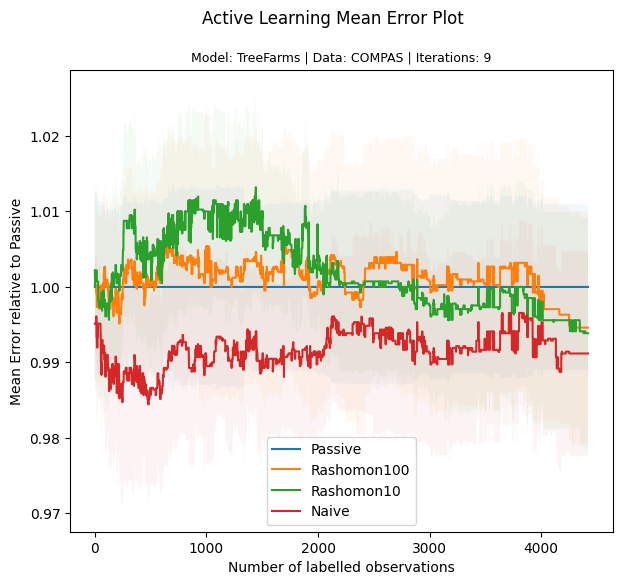

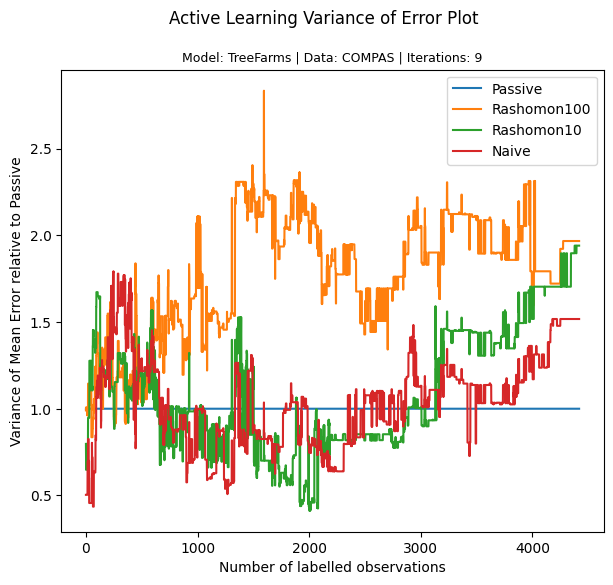

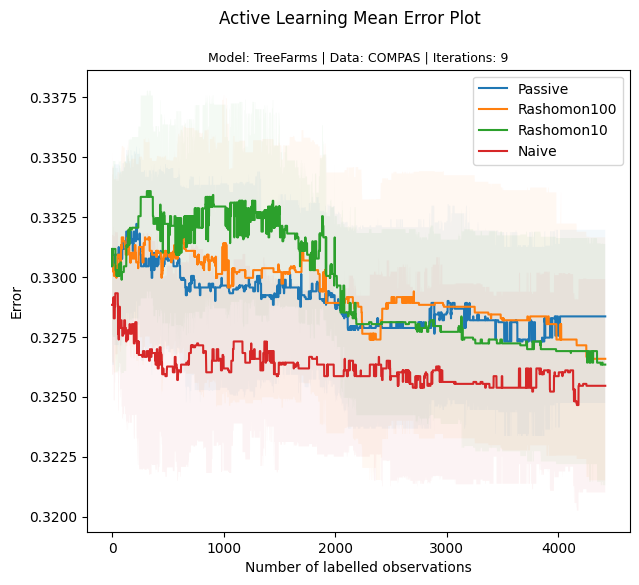

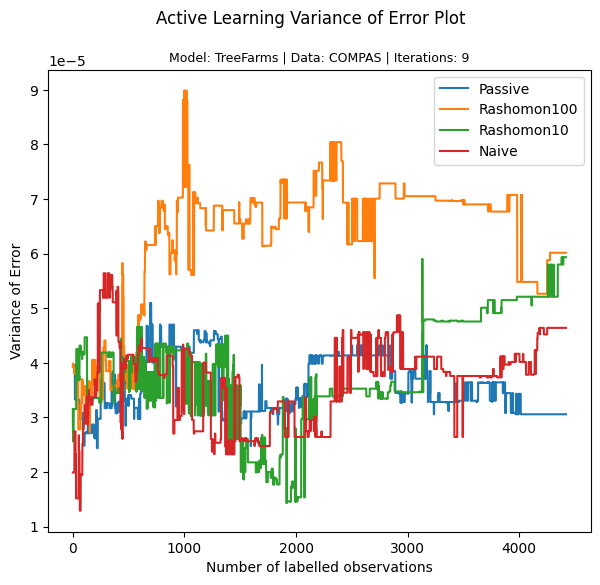

In [8]:
### Set Up ###
WRSTResultsDict = {}

### Get Results ###
for i in range(0, len(Combinations)):

    ### Set Up ###
    DataType = Combinations[i][0]
    ModelType = Combinations[i][1]
    RelativeType = Combinations[i][2]
    PlotArgs = {"TransparencyVal" : 0.05, "CriticalValue" : 1.96, "RelativeError" : RelativeType}
    
    ### Get Results ###
    WRSTResults, MeanPlot, VariancePlot =  MakePlotFunctions(DataType, ModelType, PlotArgs, SaveInput = False)
    
    ### Save WRST Results ###
    if DataType not in WRSTResultsDict:
        WRSTResultsDict[DataType] = {}
    WRSTResultsDict[DataType][ModelType] = WRSTResults

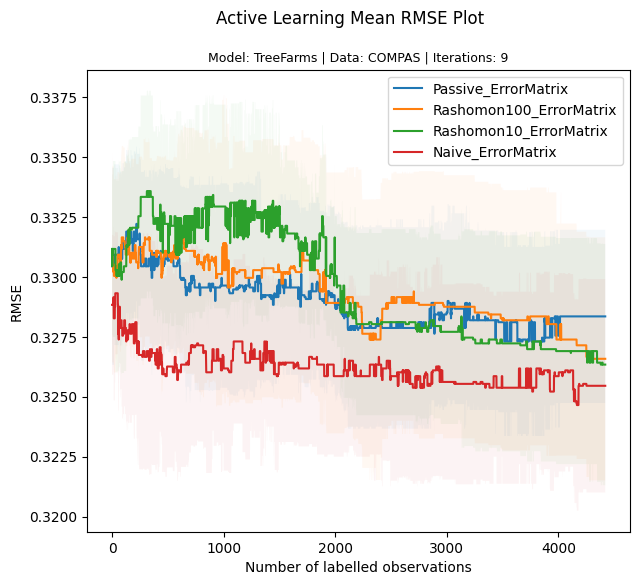

In [13]:
MeanPlot

In [5]:
Combinations

[('COMPAS', 'TreeFarms', None)]

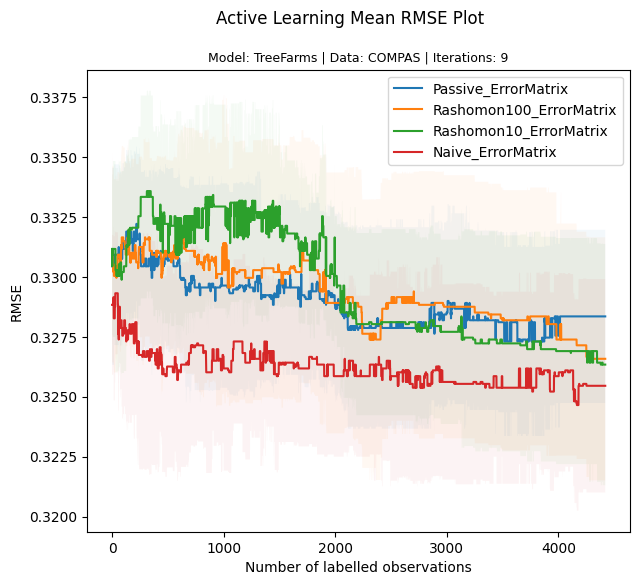

In [4]:
MeanPlot

In [16]:
### Wilcoxon Ranked Sign Test ###
WRSTResults = WilcoxonRankSignedTest({
    key: np.mean(value, axis=0)
    for key, value in SimulationErrorResults.items()
})

In [18]:
WRSTResults

,RashomonQBC_MTTreeFarmsRashomonNum1010_ErrorMatrix,RashomonQBC_MTTreeFarmsRashomonNum11_ErrorMatrix,RashomonQBC_MTTreeFarmsRashomonNum100100_ErrorMatrix,PassiveLearning_MTTreeFarmsRashomonNum11_ErrorMatrix
RashomonQBC_MTTreeFarmsRashomonNum1010_ErrorMatrix,1.0,,,
RashomonQBC_MTTreeFarmsRashomonNum11_ErrorMatrix,0.0,1.0,,
RashomonQBC_MTTreeFarmsRashomonNum100100_ErrorMatrix,1.3888622565864309e-46,0.0,1.0,
PassiveLearning_MTTreeFarmsRashomonNum11_ErrorMatrix,7.833061194341309e-107,0.0,3.71612788261029e-198,1.0
